In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from eva_driver import driver

# Excecuting Query

In [2]:
result = driver("SELECT FASTRCNN FROM TEST_1 WHERE FASTRCNN='CAR'")
print(len(result))

1


<br/>
<br/>
<br/>


# Creating a more Interactable Resultset using Pandas

In [24]:
#Create a HashMap for frame ID's 
#Create a Pandas Data Frame 

data = {'FrameID':[],
        'FrameData': [],
        'Labels': [],
        'BoundingBoxes': [], #UpperLeft XY
        'WidthHeight' : []
       } 

index = 0

#Constructing a ResultSet using Pandas
for batch in result:
    batch_predictions = batch.get_outcomes_for('fastrcnn')
    print(len(batch_predictions))
    for frame, prediction in zip(batch.frames, batch_predictions):
        print(prediction.labels)
        
        data['FrameID'].append(frame.index)
        data['FrameData'].append(frame.data) #frame.data

        data['Labels'].append([])
        data['BoundingBoxes'].append([])
        data['WidthHeight'].append([])
        
        #for box in a frame
        for bounding_box, label  in zip(prediction.boxes, prediction.labels):
            bottom_left_x = bounding_box.top_left.x
            bottom_left_y = bounding_box.bottom_right.y
            
            upper_left_x = bounding_box.top_left.x
            upper_left_y = bounding_box.top_left.y
            width = abs(bounding_box.top_left.x - bounding_box.bottom_right.x)
            height = abs(bounding_box.top_left.y - bounding_box.bottom_right.y)
            
    
            data['Labels'][index].append(label)
            data['BoundingBoxes'][index].append((upper_left_x, upper_left_y))
            data['WidthHeight'][index].append((width,height))
            
        index += 1
            
            
#print(data)

5
['car', 'person', 'person', 'car', 'fire hydrant', 'car']
['car', 'car', 'car', 'person', 'person', 'fire hydrant']
['car', 'car', 'person', 'person', 'fire hydrant']
['car', 'car', 'person', 'person', 'car']
['car', 'person', 'car', 'person', 'person', 'fire hydrant', 'bus']




<br/>
<br/>
<br/>



### Create Pandas DF and use FrameID as PK

In [37]:
result_set = pd.DataFrame(data)

#Setting FrameID as PK
result_set.set_index('FrameID', inplace = True) 
print(result_set.dtypes)
print(result_set)

#Convert Types here
'''
FrameID : string;
FrameData: Array of Numpy Arrays;
Labels: Array of labels(labels :Array of string);


BoundingBoxes: Array of, Array of boxes(box: tuple(int x, int y));


WidthHeight: Array of, Array of WidthHeights(WidthHeights: tuple(int w, int h));
'''
#Convert Here result_set = result_set['FrameData'].astype(str)
print(result_set.dtypes)

FrameData        object
Labels           object
BoundingBoxes    object
WidthHeight      object
dtype: object
                                                 FrameData  \
FrameID                                                      
0        [[[150, 151, 147], [151, 152, 148], [152, 153,...   
1        [[[152, 151, 148], [153, 152, 149], [154, 153,...   
2        [[[154, 151, 148], [155, 152, 149], [156, 153,...   
3        [[[152, 151, 148], [153, 152, 149], [155, 154,...   
4        [[[150, 151, 147], [151, 152, 148], [154, 155,...   

                                                    Labels  \
FrameID                                                      
0            [car, person, person, car, fire hydrant, car]   
1            [car, car, car, person, person, fire hydrant]   
2                 [car, car, person, person, fire hydrant]   
3                          [car, car, person, person, car]   
4        [car, person, car, person, person, fire hydran...   

                    

# Interacting with the Result Set

In [35]:
def get_frame_from_frame_id(frame_id):
    try:
        return result_set.loc(frame_id)
    except KeyError:
        return None 

frame_1 = get_frame_from_frame_id("1") 
print(frame_1['FrameData'])
#plt.imshow(frame_1['FrameData'])

ValueError: No axis named 1 for object type <class 'pandas.core.frame.DataFrame'>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


5
['car', 'person', 'person', 'car', 'fire hydrant', 'car']
['car', 'car', 'car', 'person', 'person', 'fire hydrant']
['car', 'car', 'person', 'person', 'fire hydrant']
['car', 'car', 'person', 'person', 'car']
['car', 'person', 'car', 'person', 'person', 'fire hydrant', 'bus']


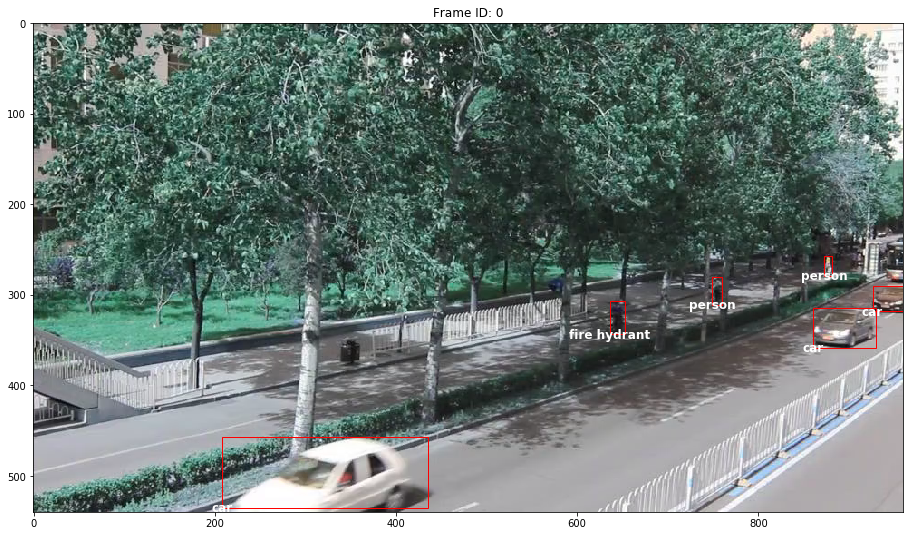

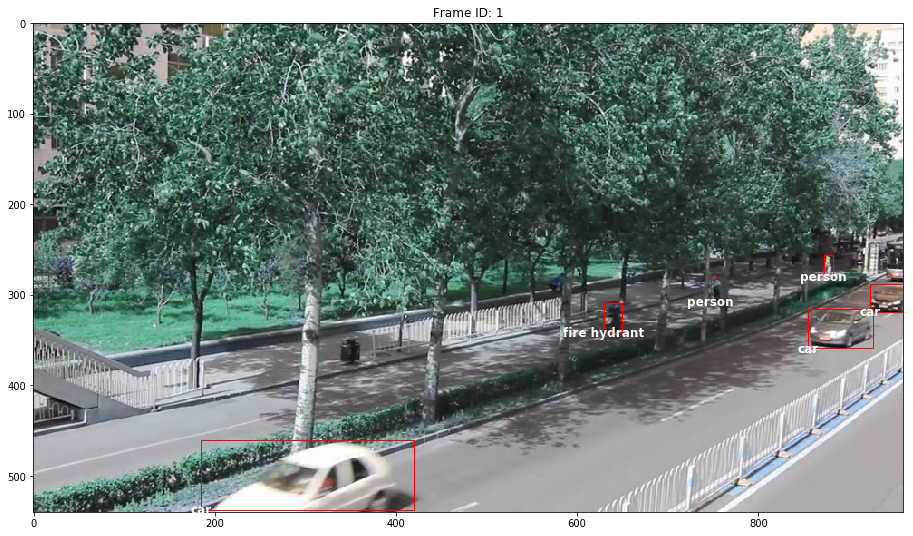

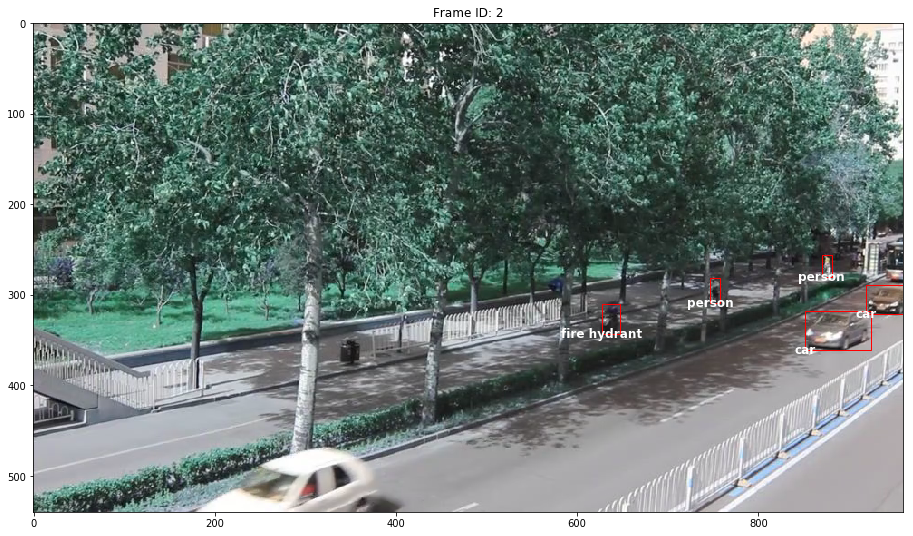

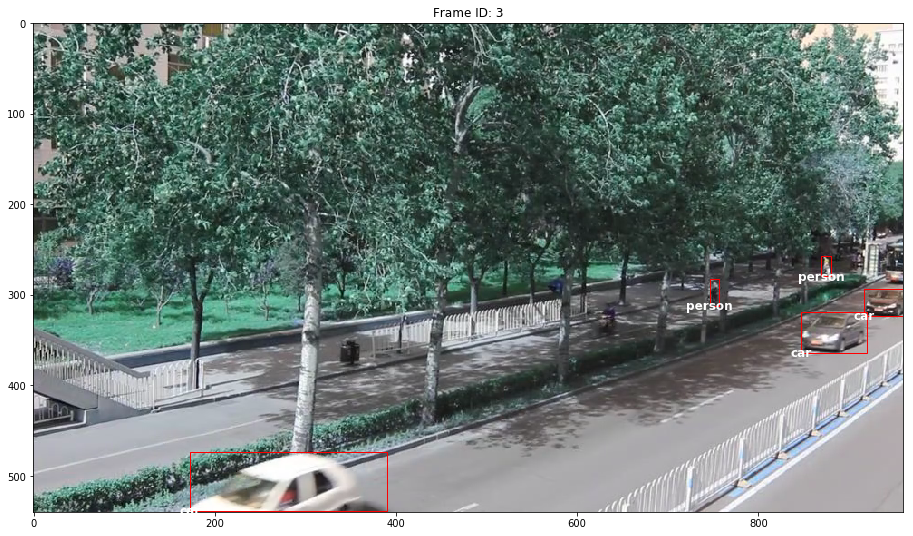

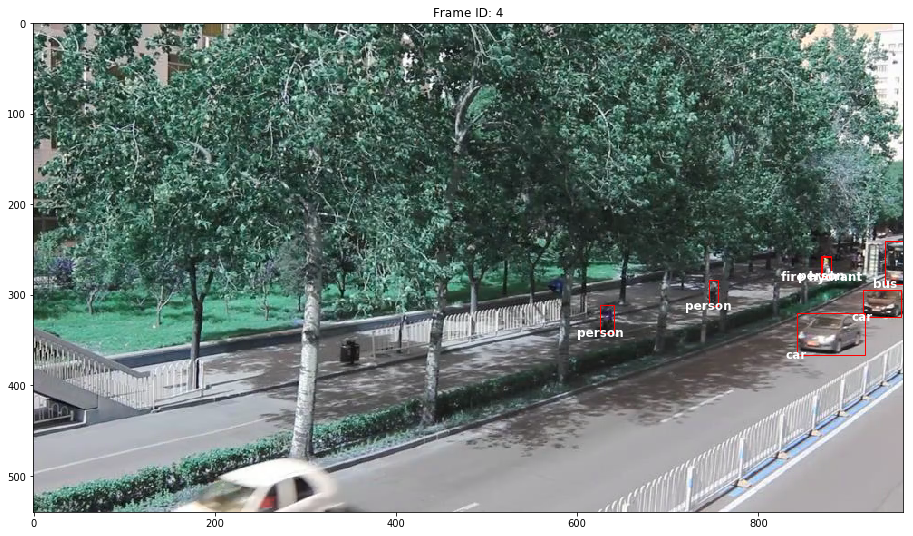

In [12]:
#Print All Frames from Result

for batch in result:
    batch_predictions = batch.get_outcomes_for('fastrcnn')
    print(len(batch_predictions))
    for frame, prediction in zip(batch.frames, batch_predictions):
        print(prediction.labels)
        fig, axes = plt.subplots(figsize=(16,9)) #figure()
        
        plt.title("Frame ID: {}".format(frame.index))
        plt.imshow(frame.data)
        
        #for box in a frame
        for bounding_box, label  in zip(prediction.boxes, prediction.labels):
            bottom_left_x = bounding_box.top_left.x
            bottom_left_y = bounding_box.bottom_right.y
            
            upper_left_x = bounding_box.top_left.x
            upper_left_y = bounding_box.top_left.y
            width = abs(bounding_box.top_left.x - bounding_box.bottom_right.x)
            height = abs(bounding_box.top_left.y - bounding_box.bottom_right.y)
            
            rectangle = patches.Rectangle( (upper_left_x, upper_left_y),
                                          width,height,linewidth=1,edgecolor='r',facecolor='none' )
            axes.add_patch(rectangle) 
            
            axes.annotate(label, (bottom_left_x, bottom_left_y), color='w', weight='bold', 
                fontsize=12, ha='center', va='center')
        